<a href="https://colab.research.google.com/github/gyanoday06/Emotion_Sentiment_Analysis/blob/main/DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
#Read csv, Clean Text:

import pandas as pd
import string
import re

df = pd.read_csv('sample_data.csv')

# Function to clean text
def clean_text(text):
    lower_case = text.lower()
    cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
    cleaned_text = re.sub(r'[^\x00-\x7F]+', '', cleaned_text)
    return cleaned_text

df['Text'] = df['Text'].apply(clean_text)

print(df)

                                                  Text
0                         enjoying the journey of life
1                        hey there i am using whatsapp
2                             last seen 68 days before
3                      trynna make sum good happen ffs
4                                        enjoying life
..                                                 ...
290     missing my family  cant wait to see them soon 
291  feeling grateful for friends who are always there
292                feeling lost but not giving up hope
293  taking a mental health break  selfcare is impo...
294  laughter is the best medicine  needed a good l...

[295 rows x 1 columns]


In [89]:
# Tokenize and Remove Stop Words:

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import nltk
nltk.download('punkt')
nltk.download('stopwords')

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens_without_stopwords = [word for word in tokens if word not in stopwords.words('english')]
    print(tokens_without_stopwords)
    return tokens_without_stopwords

df['Tokenized_Text'] = df['Text'].apply(tokenize_and_remove_stopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['enjoying', 'journey', 'life']
['hey', 'using', 'whatsapp']
['last', 'seen', '68', 'days']
['trynna', 'make', 'sum', 'good', 'happen', 'ffs']
['enjoying', 'life']
['hey', 'using', 'whatsapp']
['available']
['hustle', 'haters', 'ask', 'hiring']
['hey', 'using', 'whatsapp']
['soon']
['work']
['isp']
['available']
[]
['cheers', 'moments', 'enjoyyy']
['available']
['sea', 'never', 'made', 'skillful', 'sailor']
[]
[]
['never', 'forget', 'started']
['sleeping']
['busy']
['sleeping']
['cant', 'talk', 'whatsapp']
['hey', 'using', 'whatsapp']
['typing']
['available']
['movies']
['dont', 'disturb']
['loading']
['dont', 'text', 'call']
['hey', 'using', 'whatsapp']
['sleeping']
['live', 'love']
['prolly', 'asleep']
['busy']
[]
[]
['story', 'eye', 'witnessed']
['sleeping']
[]
['available']
['keep', 'simple']
['hey', 'using', 'whatsapp']
['sleepy']
['gym']
['available']
['busy']
['bell']
['rising']
['momento', 'mori']
['simplicity', 'key', 'happiness']
['ok']
[]
['sudhar', 'jao', 'wo', 'aa', 'raha'

In [111]:
def get_emotion(word, emotions_dict):
    word_lower = word.lower()
    if word_lower in emotions_dict:
        return emotions_dict[word_lower]
    else:
        return 'neutral'

def get_sentence_emotions(text, emotions_dict):
    tokens = text.split()
    emotions = [get_emotion(word, emotions_dict) for word in tokens]
    non_neutral_emotions = [emotion for emotion in emotions if emotion != 'neutral']
    emotion_counts = {}
    for emotion in non_neutral_emotions:
        if emotion in emotion_counts:
            emotion_counts[emotion] += 1
        else:
            emotion_counts[emotion] = 1
    return emotion_counts

emotions_dict = {}
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.strip().replace("'", '').split(':')
        word, emotion = clear_line
        emotions_dict[word] = emotion

text_list = df['Text'].tolist()

for text in text_list:
    sentence_emotions = get_sentence_emotions(text, emotions_dict)
    print(f"Sentence: {text}")
    print(f"Emotions (count): {sentence_emotions}")

    if sentence_emotions:
        max_count = max(sentence_emotions.values())
        max_probability_emotions = [emotion for emotion, count in sentence_emotions.items() if count == max_count and emotion != 'neutral']

        if len(max_probability_emotions) > 0:
            predicted_emotion = sorted(max_probability_emotions)[0]
        else:
            predicted_emotion = 'neutral'

        total_emotions = sum(sentence_emotions.values())
        emotion_probabilities = {emotion: count / total_emotions for emotion, count in sentence_emotions.items()}
        print(f"Emotion Probabilities (optional): {emotion_probabilities}")
        print(f"Predicted Emotion: {predicted_emotion}\n")
    else:
        print("No non-neutral emotions found in the sentence.\n")


# from textblob import TextBlob

# def get_emotion(text, emotions_dict):
#   # Convert text to lowercase for case-insensitive matching
#   text_lower = text.lower()
#   if text_lower in emotions_dict:
#     return emotions_dict[text_lower]
#   else:
#     return 'neutral'

# def get_sentence_emotions(text, emotions_dict):
#   tokens = tokenize_and_remove_stopwords(text)
#   emotions = [get_emotion(word, emotions_dict) for word in tokens]
#   emotion_counts = {}
#   for emotion in emotions:
#     if emotion in emotion_counts:
#       emotion_counts[emotion] += 1
#     else:
#       emotion_counts[emotion] = 1
#   return emotion_counts

# def predict_emotion_textblob(text):
#   # Use TextBlob for sentiment analysis
#   sentiment = TextBlob(text).sentiment
#   if sentiment.polarity > 0:
#     return "positive"
#   elif sentiment.polarity < 0:
#     return "negative"
#   else:
#     return "neutral"

# # Assuming you have your DataFrame 'df' with the 'Text' column and 'emotions.txt' file
# emotions_dict = {}
# with open('emotions.txt', 'r') as file:
#   for line in file:
#     clear_line = line.strip().replace("'", '').split(':')
#     word, emotion = clear_line
#     emotions_dict[word] = emotion

# text_list = df['Text'].tolist()

# for text in text_list:
#   sentence_emotions = get_sentence_emotions(text, emotions_dict)
#   print(f"Sentence: {text}")
#   print(f"Emotions (count): {sentence_emotions}")
#   predicted_emotion = predict_emotion_textblob(text)
#   print(f"Predicted Emotion (TextBlob): {predicted_emotion}\n")  # Print with newline


Sentence: enjoying the journey of life
Emotions (count): {' happy,': 2, ' excited,': 1}
Emotion Probabilities (optional): {' happy,': 0.6666666666666666, ' excited,': 0.3333333333333333}
Predicted Emotion:  happy,

Sentence: hey there i am using whatsapp
Emotions (count): {' greeting,': 1, ' neutral,': 2}
Emotion Probabilities (optional): {' greeting,': 0.3333333333333333, ' neutral,': 0.6666666666666666}
Predicted Emotion:  neutral,

Sentence: last seen 68 days before
Emotions (count): {' neutral,': 4}
Emotion Probabilities (optional): {' neutral,': 1.0}
Predicted Emotion:  neutral,

Sentence: trynna make sum good happen ffs
Emotions (count): {' frustrated,': 2, ' neutral,': 2, ' happy,': 1, ' hopeful,': 1}
Emotion Probabilities (optional): {' frustrated,': 0.3333333333333333, ' neutral,': 0.3333333333333333, ' happy,': 0.16666666666666666, ' hopeful,': 0.16666666666666666}
Predicted Emotion:  frustrated,

Sentence: enjoying life
Emotions (count): {' happy,': 2}
Emotion Probabilities 

In [113]:
!pip install matplotlib

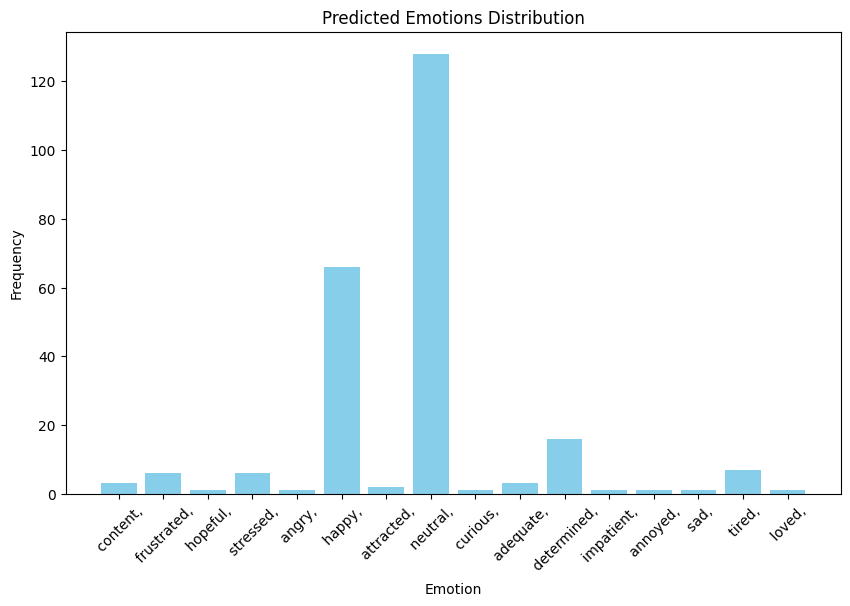

In [115]:
import matplotlib.pyplot as plt

emotions_dict = {}
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.strip().replace("'", '').split(':')
        word, emotion = clear_line
        emotions_dict[word] = emotion

text_list = df['Text'].tolist()

predicted_emotions_list = []

for text in text_list:
    sentence_emotions = get_sentence_emotions(text, emotions_dict)

    if sentence_emotions:
        max_count = max(sentence_emotions.values())
        max_probability_emotions = [emotion for emotion, count in sentence_emotions.items() if count == max_count and emotion != 'neutral']

        if len(max_probability_emotions) > 0:
            predicted_emotion = sorted(max_probability_emotions)[0]
        else:
            predicted_emotion = 'neutral'

        predicted_emotions_list.append(predicted_emotion)

emotion_counts = {emotion: predicted_emotions_list.count(emotion) for emotion in set(predicted_emotions_list)}

plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Predicted Emotions Distribution')
plt.xticks(rotation=45)
plt.show()


In [135]:
from transformers import pipeline

# Load the pre-trained sentiment analysis model
sentiment_analysis = pipeline("sentiment-analysis")

def analyze_sentiment(text):
  """Analyzes sentiment using the pre-trained model and returns emotion."""
  sentiment = sentiment_analysis(text)  # Returns a list of dictionaries
  return sentiment[0]['label']  # Access label from the first dictionary

text_list = df['Text'].tolist()

# Open the CSV file for writing in append mode ('a')
with open("sentiment_analysis.csv", "a", newline="") as csvfile:
  writer = csv.writer(csvfile)

  # Write header row (optional)
  # writer.writerow(["Sentence", "Predicted Emotion"])

  for text in text_list:
    predicted_emotion = analyze_sentiment(text)
    print(f"Sentence: {text}")
    print(f"Predicted Emotion: {predicted_emotion}")
    writer.writerow([text, predicted_emotion])  # Write data to CSV

print("Data exported to CSV file: sentiment_analysis.csv")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Sentence: enjoying the journey of life
Predicted Emotion: POSITIVE
Sentence: hey there i am using whatsapp
Predicted Emotion: POSITIVE
Sentence: last seen 68 days before
Predicted Emotion: NEGATIVE
Sentence: trynna make sum good happen ffs
Predicted Emotion: POSITIVE
Sentence: enjoying life
Predicted Emotion: POSITIVE
Sentence: hey there i am using whatsapp
Predicted Emotion: POSITIVE
Sentence: available
Predicted Emotion: POSITIVE
Sentence: hustle until of the haters ask if you are hiring 
Predicted Emotion: NEGATIVE
Sentence: hey there i am using whatsapp
Predicted Emotion: POSITIVE
Sentence: soon 
Predicted Emotion: POSITIVE
Sentence: at work
Predicted Emotion: POSITIVE
Sentence: isp
Predicted Emotion: POSITIVE
Sentence: available
Predicted Emotion: POSITIVE
Sentence: 
Predicted Emotion: POSITIVE
Sentence: cheers to moments we enjoyyy
Predicted Emotion: POSITIVE
Sentence: available
Predicted Emotion: POSITIVE
Sentence: a sea never made a skillful sailor
Predicted Emotion: NEGATIVE
S

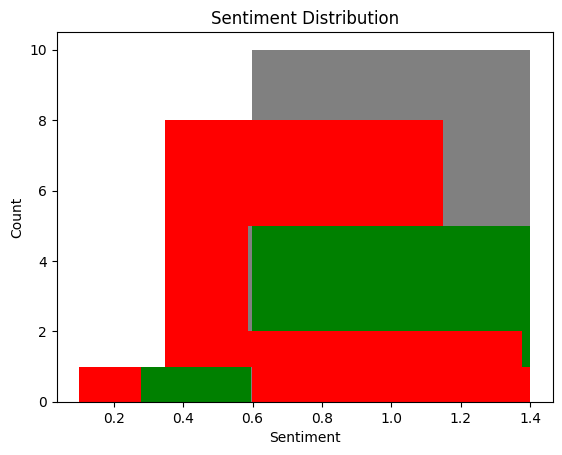

In [134]:
import matplotlib.pyplot as plt

# Collect predicted emotions from your loop
predicted_emotions = []
for text in text_list:
  _, emotion = analyze_sentiment(text)
  predicted_emotions.append(emotion)

# Count occurrences of each emotion
emotion_counts = {emotion: predicted_emotions.count(emotion) for emotion in set(predicted_emotions)}

# Create the histogram
plt.bar(emotion_counts.keys(), emotion_counts.values(), color=['green', 'red', 'gray'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

In [136]:
from transformers import pipeline
from openpyxl import Workbook

# Load the pre-trained sentiment analysis model
sentiment_analysis = pipeline("sentiment-analysis")

def analyze_sentiment(text):
  """Analyzes sentiment using the pre-trained model and returns emotion."""
  sentiment = sentiment_analysis(text)  # Returns a list of dictionaries
  return sentiment[0]['label']  # Access label from the first dictionary

text_list = df['Text'].tolist()

# Create a new Excel workbook
wb = Workbook()
ws = wb.active  # Get the active worksheet

# Write header row
ws.append(["Sentence", "Predicted Emotion"])  # Replace with desired headers if needed

for text in text_list:
  predicted_emotion = analyze_sentiment(text)
  print(f"Sentence: {text}")
  print(f"Predicted Emotion: {predicted_emotion}")
  ws.append([text, predicted_emotion])  # Write data to Excel sheet

# Save the Excel workbook
wb.save("sentiment_analysis.xlsx")

print("Data exported to Excel file: sentiment_analysis.xlsx")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Sentence: enjoying the journey of life
Predicted Emotion: POSITIVE
Sentence: hey there i am using whatsapp
Predicted Emotion: POSITIVE
Sentence: last seen 68 days before
Predicted Emotion: NEGATIVE
Sentence: trynna make sum good happen ffs
Predicted Emotion: POSITIVE
Sentence: enjoying life
Predicted Emotion: POSITIVE
Sentence: hey there i am using whatsapp
Predicted Emotion: POSITIVE
Sentence: available
Predicted Emotion: POSITIVE
Sentence: hustle until of the haters ask if you are hiring 
Predicted Emotion: NEGATIVE
Sentence: hey there i am using whatsapp
Predicted Emotion: POSITIVE
Sentence: soon 
Predicted Emotion: POSITIVE
Sentence: at work
Predicted Emotion: POSITIVE
Sentence: isp
Predicted Emotion: POSITIVE
Sentence: available
Predicted Emotion: POSITIVE
Sentence: 
Predicted Emotion: POSITIVE
Sentence: cheers to moments we enjoyyy
Predicted Emotion: POSITIVE
Sentence: available
Predicted Emotion: POSITIVE
Sentence: a sea never made a skillful sailor
Predicted Emotion: NEGATIVE
S